# Data Science & Business Analytics internship at TSF Group

# The Sparks Foundation

TASK5- Perform Exploratory Data Analysis on dataset 'Indian Premier League'

As a sports analysts, find out the most successful teams, players and factorscontributing win or loss of a team.

By - Shubham Wakade Data Science & Business Analytics intern at The Sparks Foundation (TSF)

# Step -1:- Importing the required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
print('Libraries are imported Successfully..')

Libraries are imported Successfully..


# Step-2:- Importing the dataset

In [7]:
DELIVERIES_DATA = pd.read_csv(r"C:\Users\shubham\Downloads\IPL\deliveries.csv")
DELIVERIES_DATA

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [8]:
MATCHES_DATA = pd.read_csv(r"C:\Users\shubham\Downloads\IPL\matches.csv")
MATCHES_DATA

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


# Checking the shape of data

In [9]:
DELIVERIES_DATA.shape

(179078, 21)

In [10]:
MATCHES_DATA.shape

(756, 18)

# Full Data Summary

In [11]:
DELIVERIES_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [12]:
MATCHES_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Statistical Summary of Data

In [13]:
DELIVERIES_DATA.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [14]:
MATCHES_DATA.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


# Columns in the data

In [15]:
DELIVERIES_DATA.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [16]:
MATCHES_DATA.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# Finding out Null values in Each Columns

In [17]:
DELIVERIES_DATA.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [18]:
MATCHES_DATA.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# Total number of NaN values in the deliveries dataset

In [19]:
DELIVERIES_DATA.isnull().sum().sum()

513118

# Total number of NaN values in the matches dataset

In [20]:
MATCHES_DATA.isnull().sum().sum()

656

# Dropping of Columns having signigicant number of Null values

In [21]:
matches1 =MATCHES_DATA.drop(columns=['umpire3'], axis =1)
matches1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [22]:
matches1.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

In [23]:
matches1.fillna(0,inplace=True)

In [24]:
matches1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,0,0
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [25]:
matches1.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

We have successfully replace the Null values with 'Zeros'

# Merging the dataset

In [26]:
season_data = matches1[['id','season','winner']]
data = DELIVERIES_DATA.merge(season_data,how = 'inner',left_on = 'match_id',right_on = 'id')

In [27]:
data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'winner'],
      dtype='object')

# Data Visualization

In [28]:
team_win_season_by_season = matches1.groupby('season')['winner'].value_counts()
team_win_season_by_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
        0                               1
Name: winner, Length: 103, dtype: int64

# Number of matches played in each IPL season

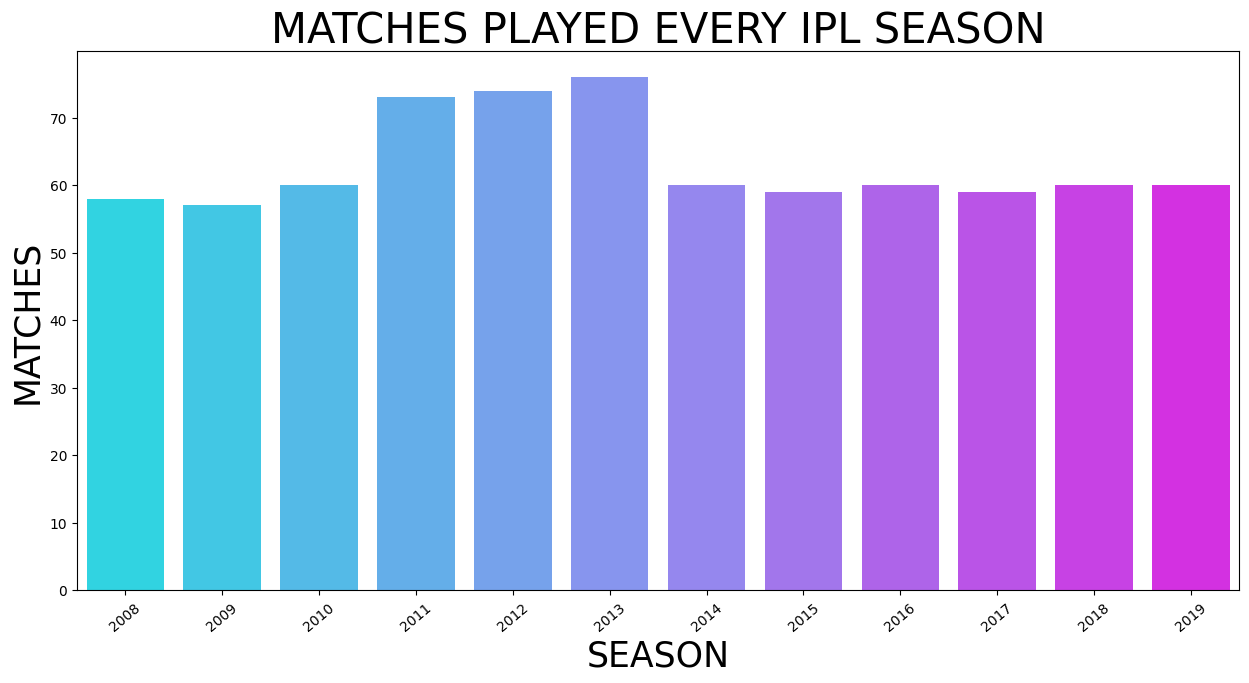

In [32]:
plt.figure(figsize = (15,7))
sns.countplot(x='season',data=matches1, palette='cool')
plt.title("MATCHES PLAYED EVERY IPL SEASON",fontsize=30)
plt.xticks(rotation=40)
plt.xlabel("SEASON",fontsize=25)
plt.ylabel("MATCHES",fontsize=25)
plt.show()

# NUMBER OF WINS BY EACH TEAM

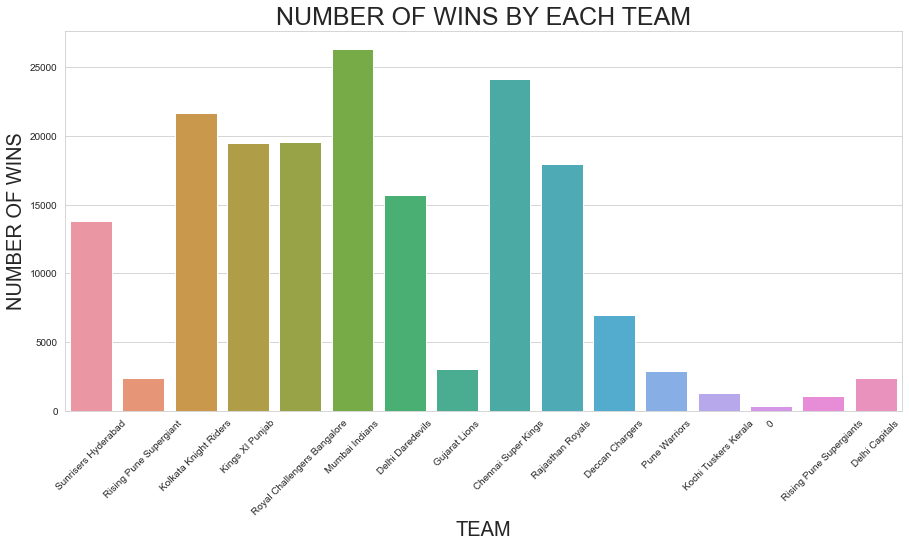

In [105]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 7))
sns.countplot(x='winner', data=data)
plt.title('NUMBER OF WINS BY EACH TEAM', fontsize=25)
plt.xlabel('TEAM', fontsize=20)
plt.ylabel('NUMBER OF WINS', fontsize=20)
plt.xticks(rotation=45)
plt.show()

# DISTRIBUTION OF DISSMISSALS

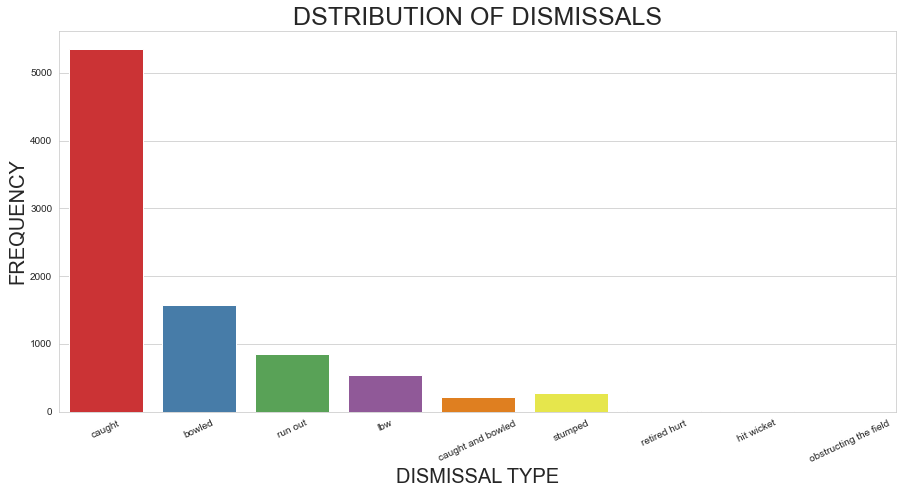

In [106]:
sns.set_palette('Set1')  # set the color palette
sns.set_style('whitegrid')
plt.figure(figsize=(15, 7))
sns.countplot(x='dismissal_kind', data=data)
plt.title('DSTRIBUTION OF DISMISSALS', fontsize=25)
plt.xlabel('DISMISSAL TYPE', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.xticks(rotation=25)
plt.show()

In [107]:
matches1.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

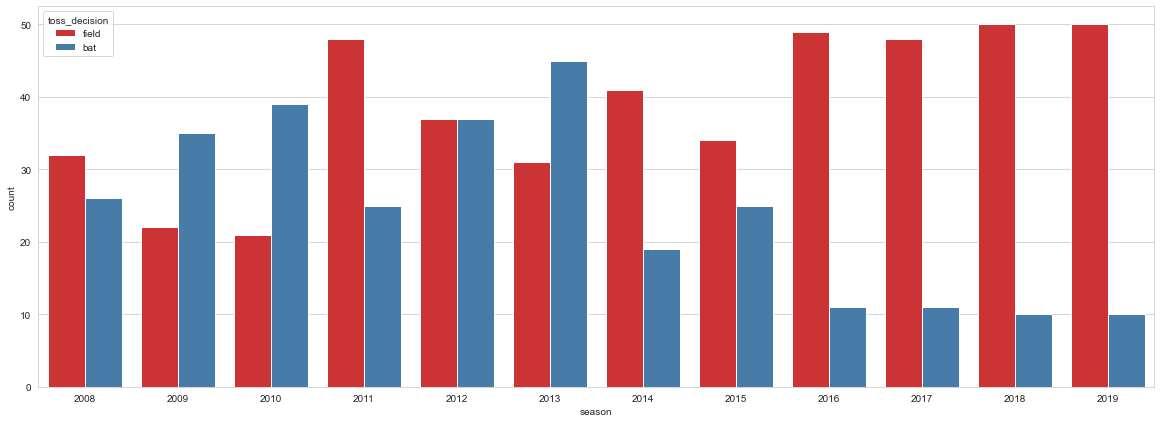

In [108]:
plt.subplots(figsize=(20,7))
sns.countplot(x='season', hue='toss_decision', data=matches1)
plt.show()

# DISTRIBUTION OF WICKETS TAKEN BY EACH BOWLING TEAM

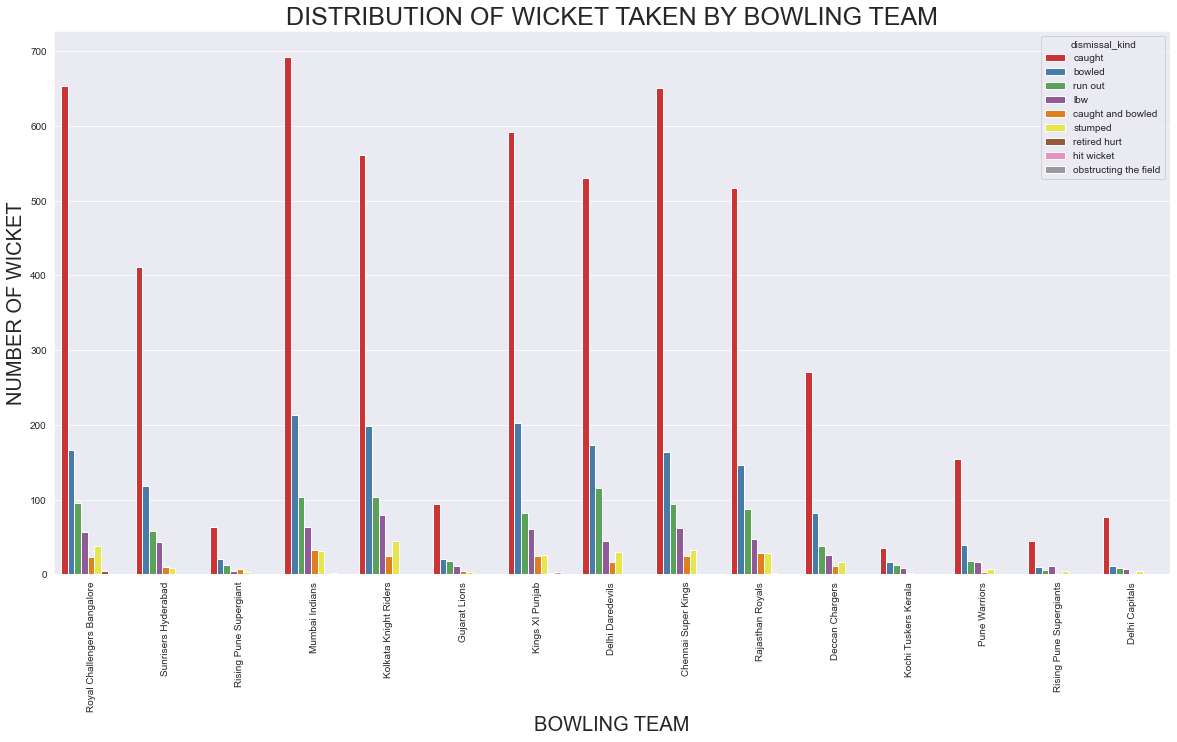

In [109]:
sns.set_style('darkgrid')
plt.figure(figsize=(20, 10))
sns.countplot(x='bowling_team', hue='dismissal_kind', data=data)
plt.title('DISTRIBUTION OF WICKET TAKEN BY BOWLING TEAM', fontsize=25)
plt.xlabel('BOWLING TEAM', fontsize=20)
plt.ylabel('NUMBER OF WICKET', fontsize=20)
plt.xticks(rotation=90)
plt.show()

# Change of average total runs scored per match over the seasons

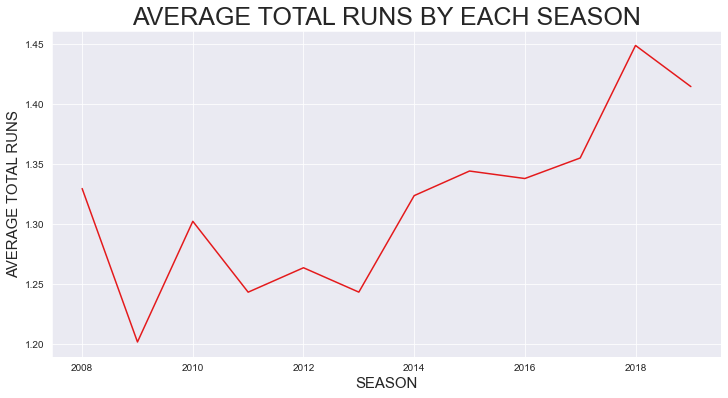

In [110]:
plt.figure(figsize=(12, 6))
plt.plot(data.groupby('season').mean().reset_index()['season'], data.groupby('season').mean().reset_index()['total_runs'])
plt.title('AVERAGE TOTAL RUNS BY EACH SEASON', fontsize=25)
plt.xlabel('SEASON', fontsize=15)
plt.ylabel('AVERAGE TOTAL RUNS', fontsize=15)
plt.show()

# Matches played across each seasons

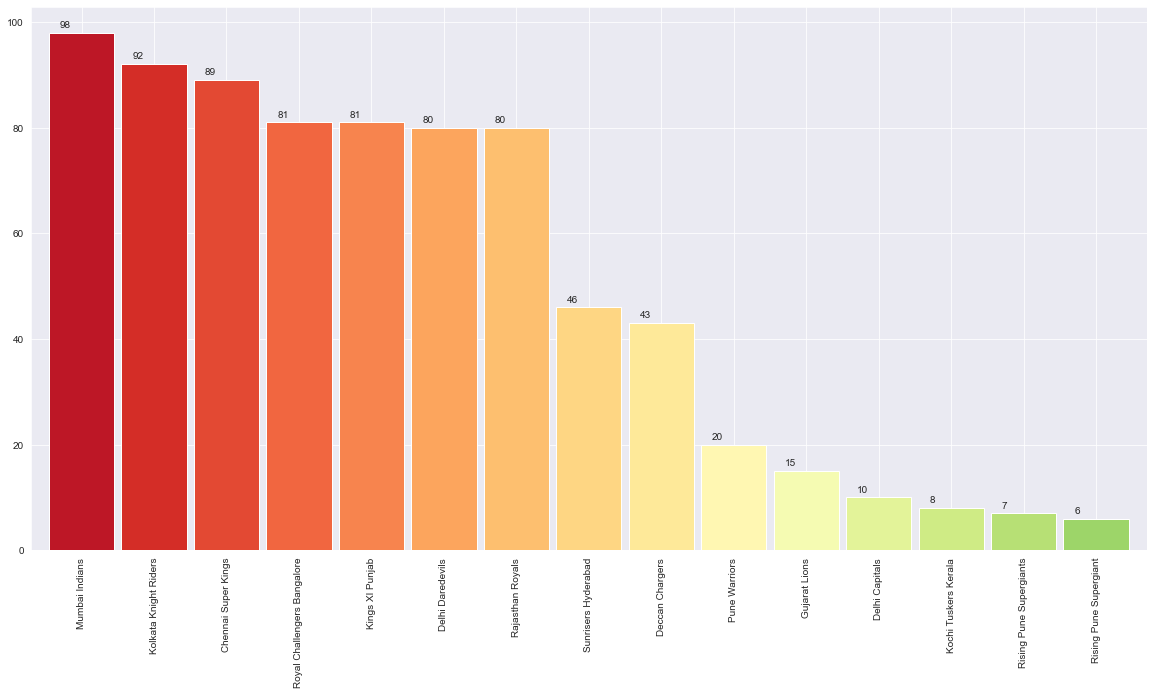

In [111]:
plt.subplots(figsize=(20,10))
ax=matches1['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn', 20))
for p in ax.patches:
          ax.annotate(format(p.get_height()),(p.get_x()+0.15, p.get_height()+1))
plt.show()  

# Top 10 Batsman from the dataset

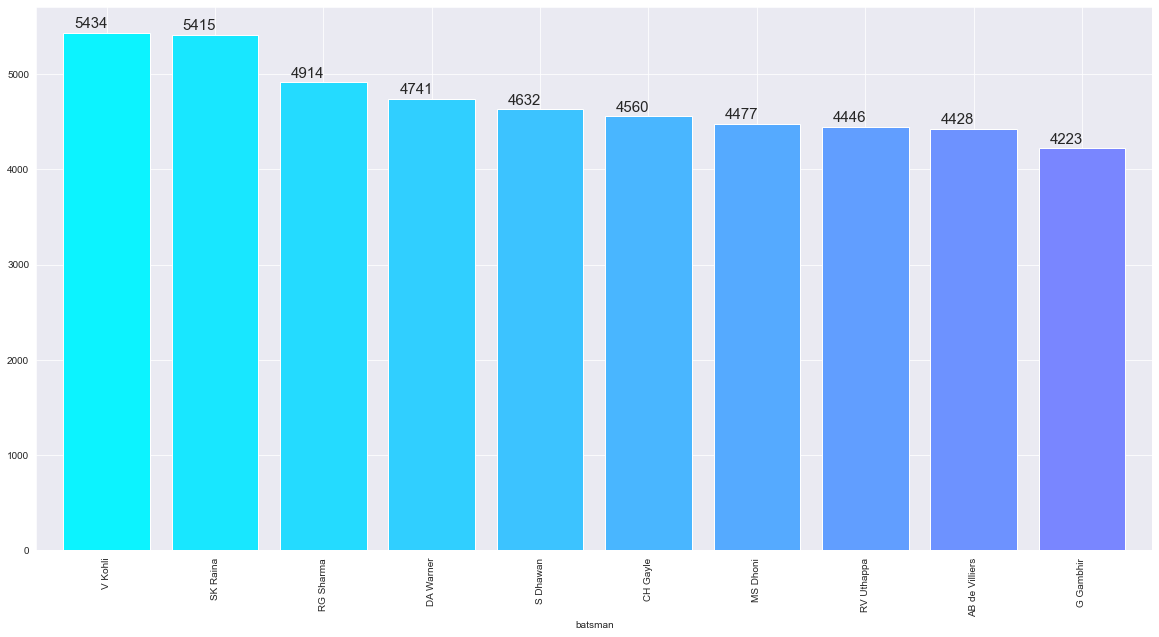

In [112]:
plt.subplots(figsize=(20,10))
max_runs=data.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('cool',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.1, p.get_height()+50),fontsize=15)
plt.show()

# Number of matches won by Toss winning side

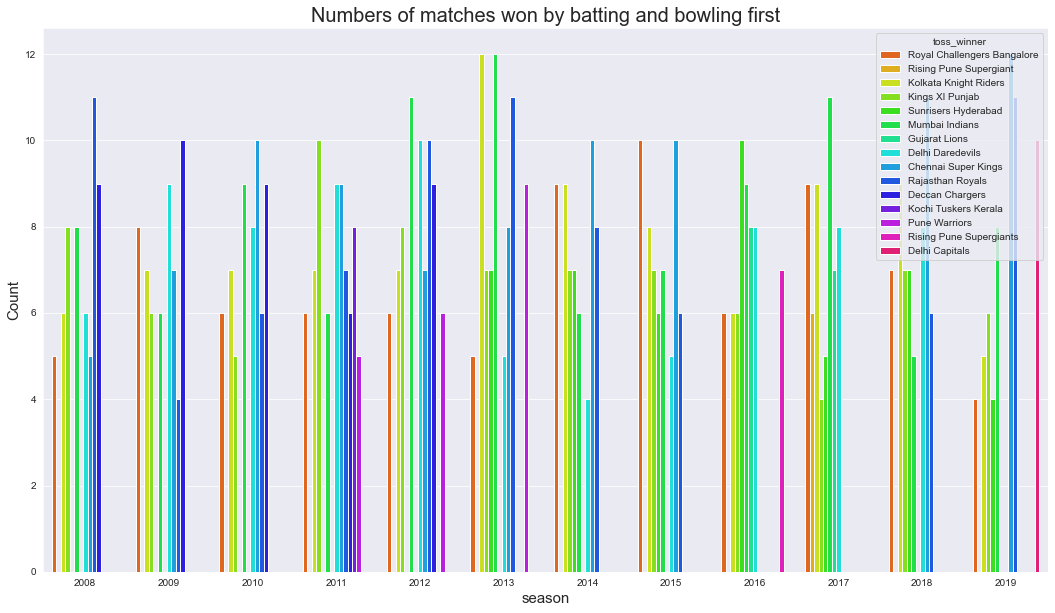

In [113]:
plt.figure(figsize=(18, 10))
sns.countplot(x='season', hue='toss_winner', data=matches1, palette='hsv')
plt.title("Numbers of matches won by batting and bowling first", fontsize=20)
plt.xlabel("season", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

# We Will Print Winner Season Wise

In [114]:
final_match_Winner=matches1.drop_duplicates(subset=['season'], keep='last')

final_match_Winner[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


# Most Successful Teams in IPL

In [115]:
winner = matches1.groupby('winner').count()['result']

In [116]:
winner = winner.sort_values(ascending=False)

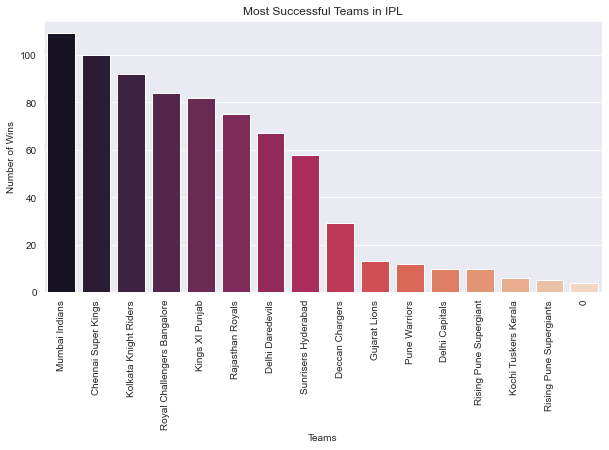

In [117]:
plt.figure(figsize=(10,5))
sns.barplot(x=winner.index, y=winner, palette="rocket")
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.title('Most Successful Teams in IPL')
plt.show()

In [118]:
wickets = data[data['dismissal_kind'] != 'run out'].groupby('bowler').count()['dismissal_kind']

In [119]:
wickets = wickets.sort_values(ascending=False)[:10]

# Most Successful Bowlers in IPL

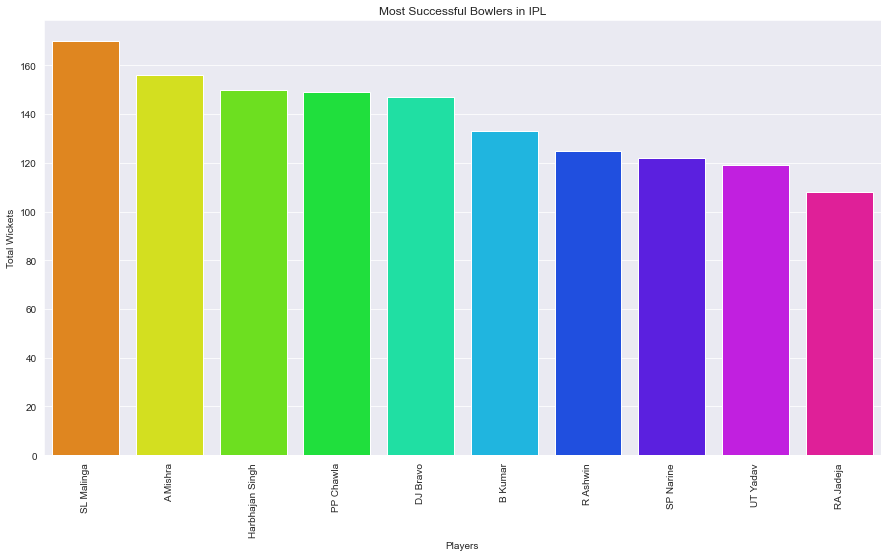

In [120]:
plt.figure(figsize=(15,8))
sns.barplot(x=wickets.index, y=wickets, palette="hsv")
plt.xticks(rotation=90)
plt.xlabel('Players')
plt.ylabel('Total Wickets')
plt.title('Most Successful Bowlers in IPL')
plt.show()

# Percentage of Times Each Decision Led to a Win

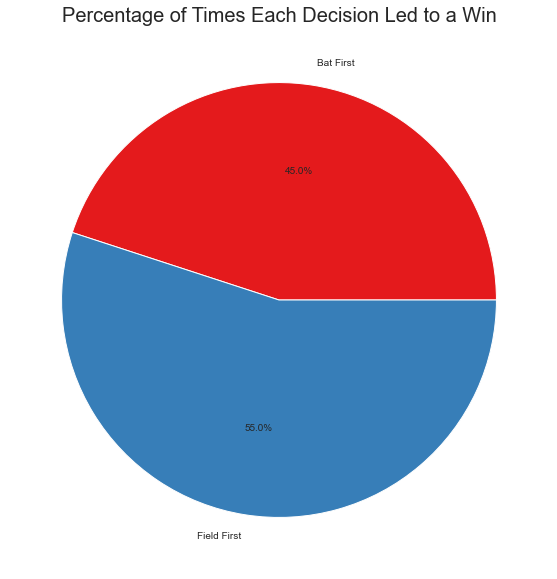

In [121]:
toss_decisions = matches1[['toss_winner', 'toss_decision', 'winner']]
toss_decisions['toss_win_match_win'] = np.where(toss_decisions['toss_winner'] == toss_decisions['winner'], 'Yes', 'No')

bat_first_win_pct = round((toss_decisions[(toss_decisions['toss_decision'] == 'bat') & (toss_decisions['toss_win_match_win'] == 'Yes')].shape[0] / toss_decisions[toss_decisions['toss_decision'] == 'bat'].shape[0]) * 100, 2)
field_first_win_pct = round((toss_decisions[(toss_decisions['toss_decision'] == 'field') & (toss_decisions['toss_win_match_win'] == 'Yes')].shape[0] / toss_decisions[toss_decisions['toss_decision'] == 'field'].shape[0]) * 100, 2)

plt.figure(figsize=(10, 10))
plt.pie([bat_first_win_pct, field_first_win_pct], labels=['Bat First', 'Field First'], autopct='%1.1f%%')
plt.title('Percentage of Times Each Decision Led to a Win', fontsize=20)
plt.show()

# Teams which has won More number of Toss

In [122]:
toss_ser =matches1['toss_winner'].value_counts()
toss_matches=pd.DataFrame(columns=['team','wins'])

for items in toss_ser.iteritems():
    temp_df3=pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_matches = toss_matches.append(temp_df3,ignore_index=True)

<Axes: title={'center': 'Which team won more number of Toss'}, xlabel='wins', ylabel='team'>

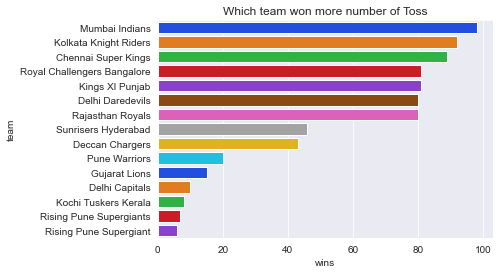

In [123]:
plt.title('Which team won more number of Toss')
sns.barplot(x='wins', y='team', data=toss_matches, palette='bright')

# Toss Result

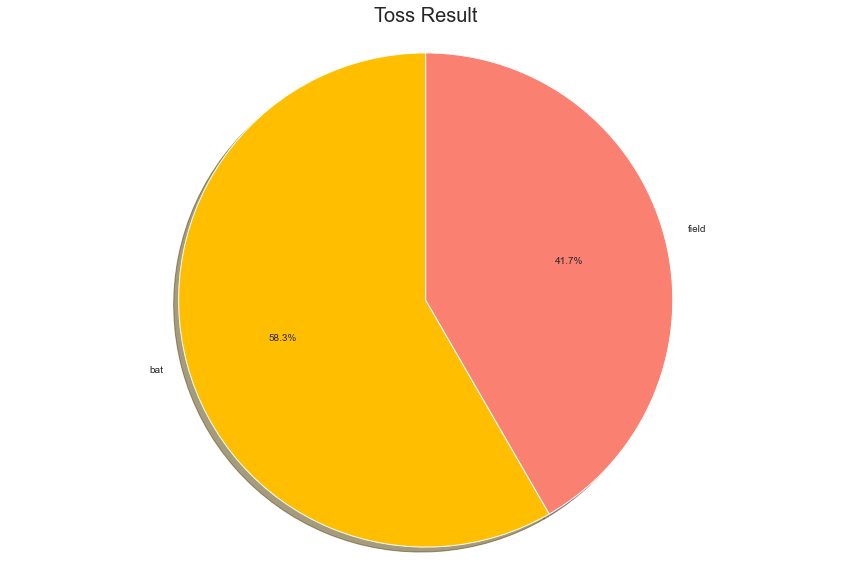

In [124]:
Toss=final_matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (15,10))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss Result', fontsize=20)
plt.axis('equal')
plt.show()

# We will print IPL finals venues and winners along with the number of wins

In [125]:
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

# We will print number of season won by teams

In [126]:
final_matches['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

# We will print toss_winner , toss_decision , winner in final matches

In [127]:
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop = True)


,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


# We will print Man of the match


In [128]:
final_matches[['winner','player_of_match']].reset_index(drop = True)


,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


# we will plot graph on four hit by teams

In [129]:
season_data=matches1[['id','season','winner']]
complete_data=data.merge(season_data,how='inner',left_on='match_id',right_on='id')
four_data=complete_data[complete_data['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


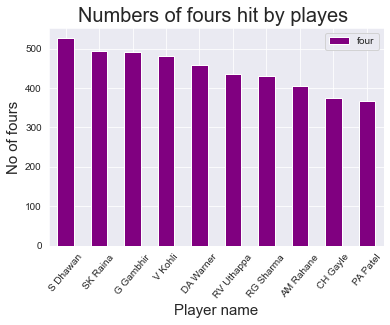

In [130]:
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='purple')
plt.title("Numbers of fours hit by playes ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

# we will print no of sixes hit by team

In [133]:
six_data=complete_data[complete_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])


,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


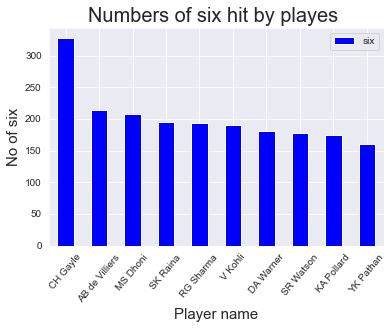

In [134]:
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='Blue')
plt.title("Numbers of six hit by playes ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

# we will print the top 10 leading run scorer in IPL

In [142]:
batsman_score = DELIVERIES_DATA.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending = False).reset_index(drop = True)
batsman_score = batsman_score.rename(columns = {'sum':'batsman_runs'})
print("--+--+--+--+--> TOP 10 LEADING RUN SCORER IN IPL <--+--+--+--+-- ")
batsman_score.iloc[:10,:]


--+--+--+--+--> TOP 10 LEADING RUN SCORER IN IPL <--+--+--+--+-- 


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


# We will print no of matches played by batsman

In [143]:
No_of_matches_played = DELIVERIES_DATA[['match_id','player_dismissed']]
No_of_matches_played = No_of_matches_played.groupby('player_dismissed')['match_id'].count().reset_index().sort_values(by = 'match_id',ascending = False).reset_index(drop = True)
No_of_matches_played.columns = ['batsman','No_of_matches_played']
No_of_matches_played.head()

,batsman,No_of_matches_played
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


# Factors Contributing to Win or Loss of a Team



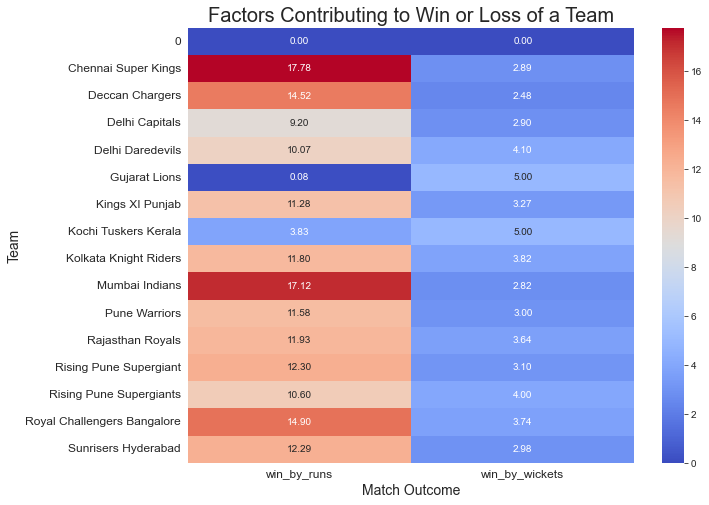

In [147]:
team_performance = matches1[['winner', 'win_by_runs', 'win_by_wickets', 'player_of_match']]
team_means = team_performance.groupby('winner').mean()
plt.figure(figsize=(10, 8))
sns.heatmap(team_means, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Factors Contributing to Win or Loss of a Team', fontsize=20)
plt.xlabel('Match Outcome', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()


# We will print IPL most wicket taking bowlers

In [150]:
DELIVERIES_DATA.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]


,bowler,count
0,SL Malinga,188
1,DJ Bravo,168
2,A Mishra,165
3,Harbhajan Singh,161
4,PP Chawla,156
5,B Kumar,141
6,R Ashwin,138
7,SP Narine,137
8,UT Yadav,136
9,R Vinay Kumar,127


##### Conslusion :


The highest number of match played in IPL season was 2013,2014,2015.

The highest number of match won by Mumbai Indians i.e 4 match out of 12 matches.

Teams which Bowl first has higher chances of winning then the team which bat first.

After winning toss more teams decide to do fielding first.

In finals teams which decide to do fielding first win the matches more then the team which bat first.

In finals most teams after winning toss decide to do fielding first.

Top player of match winning are CH gayle, AB de villers.

It is interesting that out of 12 IPL finals,9 times the team that won the toss was also the winner of IPL.

The highest number of four hit by player is Shikar Dhawan.

The highest number of six hit by player is CH gayle.

Top leading run scorer in IPL are Virat kholi, SK Raina, RG Sharma.

Dismissals in IPL was most by Catch out.

The IPL most wicket taken blower is SL Malinga.

The highest number of matches played by player name are SK Raina, RG Sharma.

Teams which has won more number of toss is Mumbai Indians.